In [37]:
#from ...imports import *
#import h5py as h5
from astropy.io import ascii
import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = ascii.read('S3_wasp43b_Table_Save.txt')

In [6]:
data

bjdtdb,wave_1d,stdspec,stdvar,optspec,opterr
float64,float32,float32,float32,float64,float64
59694.10254856695,2.450076,75311.01,14737979.0,75445.27319712478,277.84219424659517
59694.10254856695,2.45108,75193.31,14872316.0,75642.94328019823,278.2294481490999
59694.10254856695,2.452084,75675.21,14791216.0,75807.95645015159,278.56456210914644
59694.10254856695,2.453088,74924.484,14627881.0,74987.38842237392,277.16846024062295
59694.10254856695,2.454092,75941.26,15002400.0,76052.95525233702,279.05551291327396
59694.10254856695,2.455096,76547.03,14978297.0,76562.47322672996,279.97806373813364
59694.10254856695,2.4561,76012.17,14702109.0,76120.87816220928,279.1760961459533
59694.10254856695,2.457104,77733.695,15362372.0,77733.29921180973,282.13588416756687
59694.10254856695,2.458108,77671.15,1367853600.0,77759.5777437147,282.0812264308345


In [32]:
time = np.unique(data['bjdtdb'])
wave_1d = np.unique(data['wave_1d'])

In [39]:
fluxes = np.ones(shape=(len(wave_1d),len(time)))
uncertainties = np.ones_like(fluxes)

In [49]:
i_time = np.arange(len(time))

for i in range(len(wave_1d)):
    
    indices_for_this_wavelength = i_wavelength + i_time*len(wave_1d)
    fluxes[i_wavelength,i_time] = data['optspec'][indices_for_this_wavelength]
    uncertainties[i_wavelength,i_time] = data['opterr'][indices_for_this_wavelength]

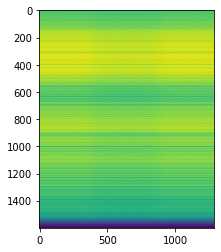

In [50]:
plt.imshow(fluxes)

In [44]:
for i in range(len(wave_1d)):
    for j in range(len(time)):
        
        index = i + j*(len(wave_1d))
        
        fluxes[i,j] = data['optspec'][index]
        uncertainties[i,j] = data['opterr'][index]

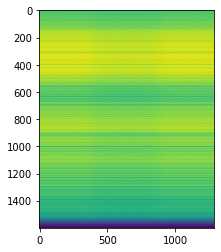

In [42]:
plt.imshow(fluxes)

In [27]:
indices = []

j = 0
for i in range(len(data['bjdtdb'])):
    
    if i == 0:
        times.append(data['bjdtdb'][0])
        indices.append(i)
        i += 1
        
    if data['bjdtdb'][i] > data['bjdtdb'][i-1]:
        j += 1 #this tracks how long the time array is, for use reorganizing the array
        indices.append(i)
        times.append(data['bjdtdb'][i])
        
       # if 
       # fluxes.append(data['optspec'][indices[j-1]:indices[j+1]])
       # waves.append(data['wave_1d'][indices[j-1]:indices[j+1]])
       # uncertainties.append(data['opterr'][indices[j-1]:indices[j+1]])
        


In [26]:
len(indices)

1287

In [ ]:
def read_stsci(filename):
    """
    Read STScI's output table (time-series spectra).
    """

    # load the event data
    data = ascii.read(filename)


    # pull out some variables
    t = data['bjdtdb']
    f = data['optspec']
    e = data['opterr']
    w = data['wave_1d']
    # this assumes the wavelength axis is the same for all exposures

    timelike = {}
    timelike["time"] = t * u.day  # TODO: check time units

    wavelike = {}
    wavelike["wavelength"] = w * u.micron  # TODO: check wavelength units

    fluxlike = {}
    fluxlike["flux"] = f.transpose()
    fluxlike["error"] = e.transpose()

    return wavelike, timelike, fluxlike
    # TO-DO: extract data properly, organize wavelengths to make a cube